In [3]:
#Messwerte:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
#Zeit
t_mess=np.linspace(0, 1900, 39)
print(t_mess)
#Spannungen:
U_mess=[1.28, 1.5, 1.68, 1.9, 2.10, 2.29, 2.45, 2.63, 2.78, 2.92, 3.06, 3.19, 3.24, 3.24, 3.27, 3.31, 3.35, 3.36, 3.38, 3.41, 3.42, 3.44, 3.47, 3.48, 3.5, 3.52, 3.54, 3.56, 3.59, 3.59, 3.60, 3.63, 3.66, 3.67, 3.66, 3.70, 3.70, 3.73, 3.75]
U_mess=np.array(U_mess)
print(U_mess)
#Beide Arrays sind gleich lang nix ist vergessen



[   0.   50.  100.  150.  200.  250.  300.  350.  400.  450.  500.  550.
  600.  650.  700.  750.  800.  850.  900.  950. 1000. 1050. 1100. 1150.
 1200. 1250. 1300. 1350. 1400. 1450. 1500. 1550. 1600. 1650. 1700. 1750.
 1800. 1850. 1900.]
[1.28 1.5  1.68 1.9  2.1  2.29 2.45 2.63 2.78 2.92 3.06 3.19 3.24 3.24
 3.27 3.31 3.35 3.36 3.38 3.41 3.42 3.44 3.47 3.48 3.5  3.52 3.54 3.56
 3.59 3.59 3.6  3.63 3.66 3.67 3.66 3.7  3.7  3.73 3.75]


C:\Users\MFame\AppData\Local\Temp\ipykernel_100188\1681675349.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov=sp.optimize.curve_fit(Eich_fit, T_eich, U_eich)


[-5.50984245e-06  3.78463600e-02  2.09170566e-47]
[[inf inf inf]
 [inf inf inf]
 [inf inf inf]]


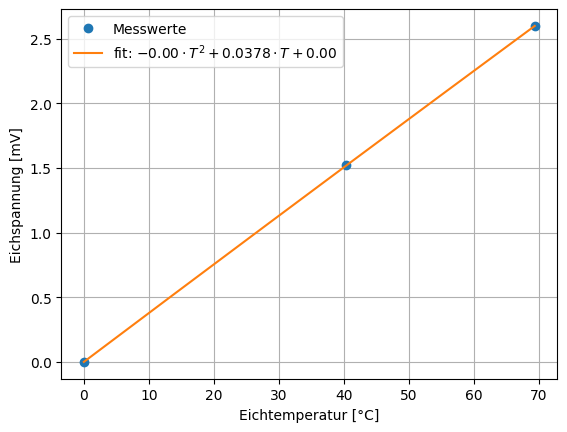

In [4]:
#Fit der Eichpunkte:

T_eich=[69.4, 40.4, 0]
U_eich=[2.6, 1.52, 0]

def Eich_fit(x, a, b ,c ):
    return a*x**2+b*x+c

popt, pcov=sp.optimize.curve_fit(Eich_fit, T_eich, U_eich)
print(popt)
print(pcov)

a_mod, b_mod, c_mod=popt
x_mod=np.linspace(min(T_eich), max(T_eich), 501)
y_mod=Eich_fit(x=x_mod, a=a_mod, b=b_mod, c=c_mod)


labelmod=rf'fit: ${a_mod:.2f} \cdot T^2+{b_mod:.4f} \cdot T+ {c_mod:.2f}$'
plt.plot(T_eich, U_eich, linestyle='', marker='o',label='Messwerte')
plt.plot(x_mod ,y_mod, linestyle='-', label=labelmod)
plt.grid(linestyle='-')
plt.legend()
plt.xlabel('Eichtemperatur [°C]')
plt.ylabel('Eichspannung [mV]')


plt.show()

In [5]:
#Umrechnung U_thermo in T Celsius

def U_thermo_in_T_Celsius(U_mess, a_mod, b_mod, c_mod):
    T=[]
    for i in range(len(U_mess)):
        xyz=( -b_mod + np.sqrt(b_mod**2 - 4 * a_mod*(c_mod-U_mess[i]) ) ) / (2 * a_mod)
        T.append(xyz)
    return T

T=U_thermo_in_T_Celsius(U_mess=U_mess, a_mod=a_mod, b_mod=b_mod, c_mod=c_mod)
print(T)


[33.98914215368079, 39.86529941384558, 44.680641066737586, 50.575364348079795, 55.94312868374949, 61.050416125427645, 65.35729486247342, 70.20912398993005, 74.25766647240448, 78.04071205717595, 81.82802639074289, 85.34865320269431, 86.70372629866041, 86.70372629866041, 87.51703349935589, 88.60175063264099, 89.68681954493589, 89.9581417786019, 90.50085229013101, 91.31508324833399, 91.58653764010306, 92.12951256440753, 92.9441403833919, 93.2157271265713, 93.7589668505005, 94.30229492710146, 94.84571139949603, 95.38921631084322, 96.20463959539518, 96.20463959539518, 96.47649162320344, 97.29218058123035, 98.10806896486524, 98.38007610150076, 98.10806896486524, 99.19623061362111, 99.19623061362111, 100.01258489309406, 100.55693213373868]


In [6]:
#Berechnung Heizsleistung
U_vers = 5.94
I_vers = 1.77
P_h=U_vers*I_vers

print(P_h)
# Fit für die Schmelzkurve
def kurve_fest_fit( x, T_u, R_th, C_tot):
    return T_u + P_h * R_th *( 1 - np.exp(-x / (R_th * C_tot)))



popt2, pcov2=sp.optimize.curve_fit(kurve_fest_fit, t_mess[0:12], T[0:12] )
print(popt2)
print(pcov2)

T_u_mod, R_th_mod, C_tot_mod = popt2

x_mod2=np.linspace(t_mess[0], t_mess[11], 501)
y_mod=kurve_fest_fit(x=x_mod2, T_u=T_u_mod, R_th=R_th_mod, C_tot=C_tot_mod)





10.513800000000002
[33.70824756 11.61563639 85.79488505]
[[0.05693653 0.08976175 0.32158422]
 [0.08976175 0.40122012 0.95975407]
 [0.32158422 0.95975407 2.69180408]]


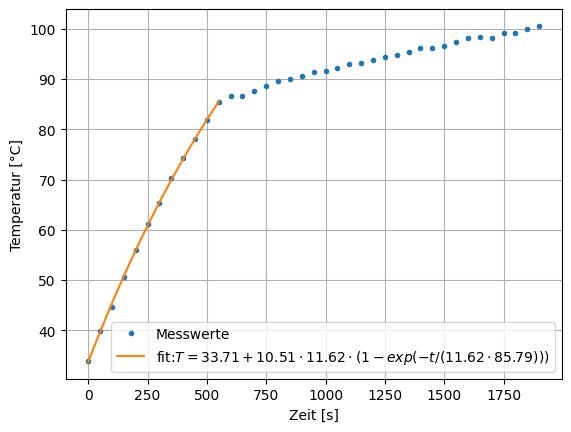

<Figure size 1800x1000 with 0 Axes>

In [7]:
#plot Zeit-Temperatur


plt.plot(t_mess, T, linestyle='', marker='.', label='Messwerte')
labelexp=rf'fit:$T={T_u_mod:.2f}+{P_h:.2f} \cdot{R_th_mod:.2f}\cdot (1-exp(-t/({R_th_mod:.2f}\cdot {C_tot_mod:.2f})))$'
plt.plot(x_mod2, y_mod, linestyle='-', marker='', label=labelexp)
plt.grid(linestyle='-')
#label lässt sich so verkleinern
mpl.rcParams.update({'font.size': 10})

plt.legend()
plt.xlabel('Zeit [s]')
plt.ylabel('Temperatur [°C]')
plt.figure(figsize=(18,10))
plt.show()

#versuch hohe Qualität nix gut bis jetzt


In [12]:
#Unsicherheiten der Knickpunkte:
#1. Knickpunkt liegt bei T(600s)=86.7 °C
t_knick1=[78.04071205717595, 81.82802639074289, 85.34865320269431, 86.70372629866041, 86.70372629866041, 87.51703349935589, 88.60175063264099]
#Mittelwert
t_mean=np.mean(t_knick1)
#Standartfehler des Mittelwerts 
t_knick1_std=np.std(t_knick1)/np.sqrt(len(t_knick1))


print(t_mean)


#2. Knickpunkt ist nicht vorhanden.

84.96337548284725


In [11]:
T_t2_scale = T[27:33] # Vom 28ten bis zum 34ten
print(T_t2_scale)

T_t2_scale_mean =np.mean(T[27:33])
print(T_t2_scale_mean)

[95.38921631084322, 96.20463959539518, 96.20463959539518, 96.47649162320344, 97.29218058123035, 98.10806896486524]
96.61253944515543
